##Las redes convolucionales

![title](https://miro.medium.com/max/700/1*XEPeVUd1ePhcE1-MU_eWsg.png)

Las redes neuronales convolucionales es un algoritmo de aprendizaje profundo (Deep Learning) que está diseñado para trabajar con imágenes, tomando estas como entrada (input) , asignándole importancias (pesos) a ciertos elementos en la imagen para así poder diferenciar unos de otros. Este es uno de los principales algoritmos que ha contribuido en el desarrollo y perfeccionamiento del campo de Visión por computadora.
Las redes convolucionales contienen varias capas ocultas (hidden layers), donde las primeras puedan detectar líneas, curvas y así se van especializando hasta poder reconocer formas complejas como un rostro, siluetas, etc. Las tareas comunes de este tipo de redes son:

* Detección o categorización de objetos
* Clasificación de escenas 
* Clasificación de imágenes en general.

Las redes toman como entrada los pixeles de una imagen. Si tenemos una imagen con apenas 28×28 pixeles de alto y ancho, eso equivale a 784 neuronas. Y eso es si sólo tenemos 1 color (escala de grises). Si tuviéramos una imagen a color, necesitaríamos 3 canales (red, green, blue) y entonces usamos 28x28x3 = 2352 neuronas de entrada. Esa es nuestra capa de entrada.

![title](https://miro.medium.com/max/700/1*_Cb1dzBhciwRi9y1-J6qjQ.png)

Pero antes es necesario normalizar los datos, es decir que nuestros pixeles que originalmente tienen valores entre 0 y 255, convertirlos a valores entre 0 y 1, esto podemos lograrlo dividiendo cada uno de los pixeles al valor más alto que estos tienen es decir 255.

#Kernel

El kernel en las redes convolucionales se considera como el filtro que se aplica a una imagen para extraer ciertas características importantes o patrones de esta.
Por ejemplo si tenemos una imagen como la siguiente.

![title](https://miro.medium.com/max/295/1*awhD4TI4-HaJP-BrfssL1Q.png)

Aplicandole un kernel de bordes, se veria como la siguiente imagen.

![title](https://miro.medium.com/max/309/1*fiU2w-EqbKJhHoV9MDCtUg.png)

Entre las características importantes para lo que sirve el kernel son detectar bordes, enfoque, desenfoque, entre otros. Esto se logra al realizar la convolución entre la imagen y el kernel.

#La convolucion

Uno de los procesos más distintivos de estas redes son las convoluciones. El cual consiste en tomar un grupo de píxeles de la imagen de entrada e ir realizando un producto escalar con un kernel. El kernel recorrerá todas las neuronas de entrada y obtendremos una nueva matriz, la cual será una de las hidden layers. En el caso de que la imagen sea de color se tendrán 3 kernels del mismo tamaño que se sumarán para obtener una imagen de salida.

![title](https://miro.medium.com/max/700/1*67NJ1OXILVMUx-tCqaWUZg.png)



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 3s 0us/step


In [3]:
print(data_dir)

/root/.keras/datasets/flower_photos


In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
print(list(data_dir.glob('*/*.jpg')))

3670
[PosixPath('/root/.keras/datasets/flower_photos/dandelion/17161833794_e1d92259d2_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/dandelion/4558536575_d43a611bd4_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/dandelion/751941983_58e1ae3957_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/dandelion/2478018280_1be353ca8c_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/dandelion/2116997627_30fed84e53_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/dandelion/5875763050_82f32f2eed_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/dandelion/10946896405_81d2d50941_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/dandelion/483097906_2c35054346.jpg'), PosixPath('/root/.keras/datasets/flower_photos/dandelion/3662701865_3ff283a33a_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/dandelion/2674176237_e265ea64cc_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/dandelion/19621170705_30bf8bf0ba.jpg'), PosixPath('/root/.keras/datas

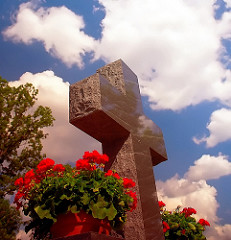

In [21]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[6]))

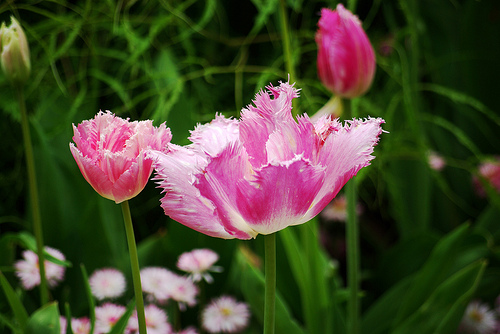

In [6]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[3]))

In [7]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


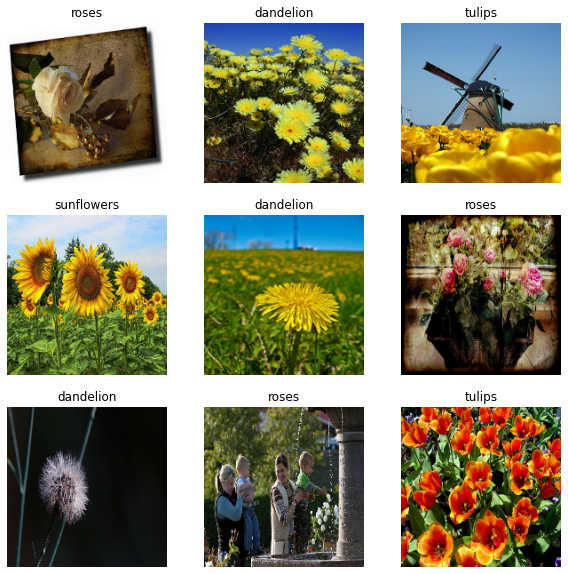

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255) 

In [14]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 
first_label = labels_batch[0]
print(first_label.eval)

0.0 1.0
<bound method _EagerTensorBase.eval of <tf.Tensor: shape=(), dtype=int32, numpy=1>>


In [15]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [22]:
#Check on edit - notebook settings - gpu acceleration
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [23]:
def cpu():
  with tf.device('/cpu:0'):
    epochs=10
    history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs
    )
    return history

def gpu():
  with tf.device('/device:GPU:0'):
    epochs=10
    history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs
    )
    return history
  
history = gpu()


Epoch 1/10
92/92 [==============================] - 14s 43ms/step - loss: 1.4168 - accuracy: 0.3767 - val_loss: 1.1773 - val_accuracy: 0.5286
Epoch 2/10
92/92 [==============================] - 2s 27ms/step - loss: 1.0839 - accuracy: 0.5545 - val_loss: 1.0626 - val_accuracy: 0.5695
Epoch 3/10
92/92 [==============================] - 2s 26ms/step - loss: 0.9046 - accuracy: 0.6482 - val_loss: 1.0007 - val_accuracy: 0.6063
Epoch 4/10
92/92 [==============================] - 2s 26ms/step - loss: 0.7183 - accuracy: 0.7337 - val_loss: 0.8893 - val_accuracy: 0.6540
Epoch 5/10
92/92 [==============================] - 2s 26ms/step - loss: 0.4782 - accuracy: 0.8236 - val_loss: 1.0209 - val_accuracy: 0.6444
Epoch 6/10
92/92 [==============================] - 2s 26ms/step - loss: 0.2705 - accuracy: 0.9097 - val_loss: 1.3331 - val_accuracy: 0.6117
Epoch 7/10
92/92 [==============================] - 2s 26ms/step - loss: 0.1615 - accuracy: 0.9506 - val_loss: 1.3274 - val_accuracy: 0.6376
Epoch 8/10
9

In [ ]:
cpu()

Epoch 1/10
40/92 [============>.................] - ETA: 48s - loss: 0.0482 - accuracy: 0.9859

KeyboardInterrupt: ignored

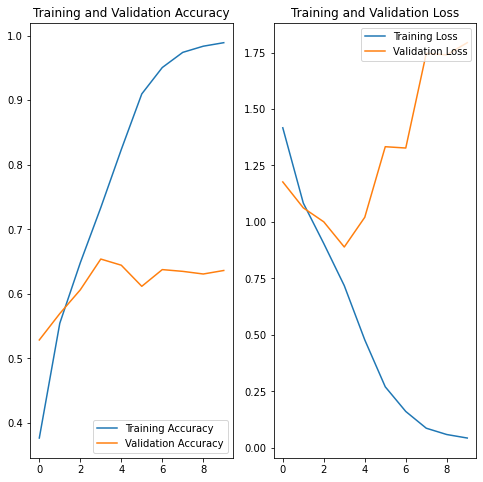

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = 10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [25]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

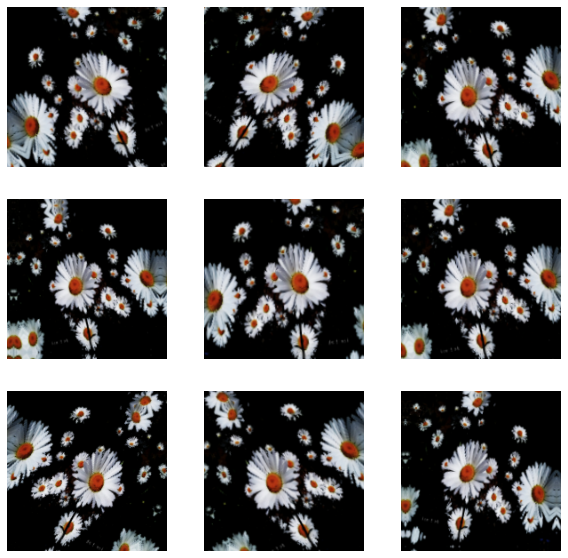

In [26]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [27]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = 'relu')
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

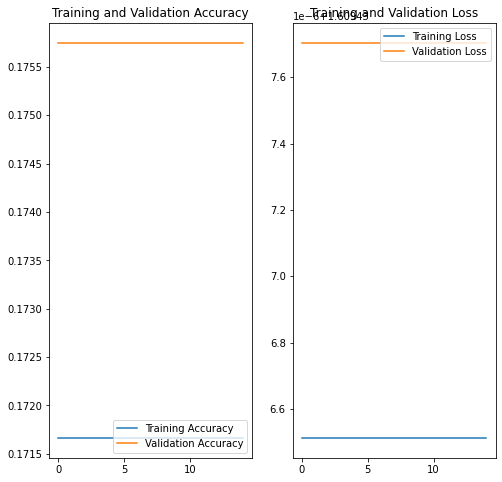

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions)
print(class_names)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 26ms/step
[[0. 0. 0. 0. 0.]]
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
This image most likely belongs to daisy with a 20.00 percent confidence.
